# EDA Overview of Extracted Data From TMDB

* How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


* How many movies are there in each of the certification categories (G/PG/PG-13/R)?


* What is the average revenue per certification category?


* What is the average budget per certification category

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

import missingno

import functions as pf

pd.set_option('display.max_columns',100)

In [2]:
FOLDER = "Data/"
sorted(os.listdir(FOLDER))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [3]:
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz',
 'Data\\final_tmdb_data_2022.csv.gz']

In [4]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files])
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r,\r
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.708,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22.0,\r,NaN
1,False,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.903,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8.0,\r,NaN
2,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0.0,\r,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",21.723,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,1943.0,PG\r,NaN
4,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.353,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46.0,R\r,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,False,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,tt7797670,en,Edmund Kemper Part 2: La Mort C'est La Vie,Underground French necrophilia nastiness,0.600,/2Xh5ywVZJC5OxKYDS26fVJfC8zq.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,False,0.000,0.0,\r,NaN
1281,False,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,tt7797790,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,0.600,/75kV4BpVnXe2kAMsWAKxx466M88.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,False,0.000,0.0,\r,NaN
1282,False,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,tt8665056,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,0.600,NaN,"[{'id': 68934, 'logo_path': None, 'name': 'Ske...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-10,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,False,

In [5]:
fname =FOLDER+'combined_tmdb_api_data.csv.gz'
df.to_csv(fname,compression='gzip',index=False)
df = pd.read_csv(fname, lineterminator='\n')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2488 non-null   bool   
 1   backdrop_path          1287 non-null   object 
 2   belongs_to_collection  196 non-null    object 
 3   budget                 2488 non-null   float64
 4   genres                 2488 non-null   object 
 5   homepage               174 non-null    object 
 6   id                     2488 non-null   float64
 7   imdb_id                2488 non-null   object 
 8   original_language      2488 non-null   object 
 9   original_title         2488 non-null   object 
 10  overview               2436 non-null   object 
 11  popularity             2488 non-null   float64
 12  poster_path            2193 non-null   object 
 13  production_companies   2488 non-null   object 
 14  production_countries   2488 non-null   object 
 15  rele

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r,\r\r
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.708,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22.0,\r,\r
1,False,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.903,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8.0,\r,\r
2,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0.0,\r,\r
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",21.723,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,1943.0,PG\r,\r
4,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.353,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46.0,R\r,\r


In [6]:
df['Release Year'] = df['release_date'].apply(lambda x: float(str(x).split('-')[0]))
df['Release Year'].value_counts()

2001.0    1237
2000.0    1109
2002.0      71
1999.0      20
2003.0      10
2005.0       5
1998.0       4
2004.0       4
1997.0       3
2011.0       2
1996.0       1
2007.0       1
2021.0       1
2006.0       1
Name: Release Year, dtype: int64

,# null,% null,# unique,% unique
adult,0,0.00,2,0.08
backdrop_path,1201,48.27,1287,51.73
belongs_to_collection,2292,92.12,173,6.95
budget,0,0.00,178,7.15
genres,0,0.00,542,21.78
homepage,2314,93.01,174,6.99
id,0,0.00,2488,100.00
imdb_id,0,0.00,2488,100.00
original_language,0,0.00,52,2.09
original_title,0,0.00,2482,99.76


C:\Users\nbeac\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nbeac\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


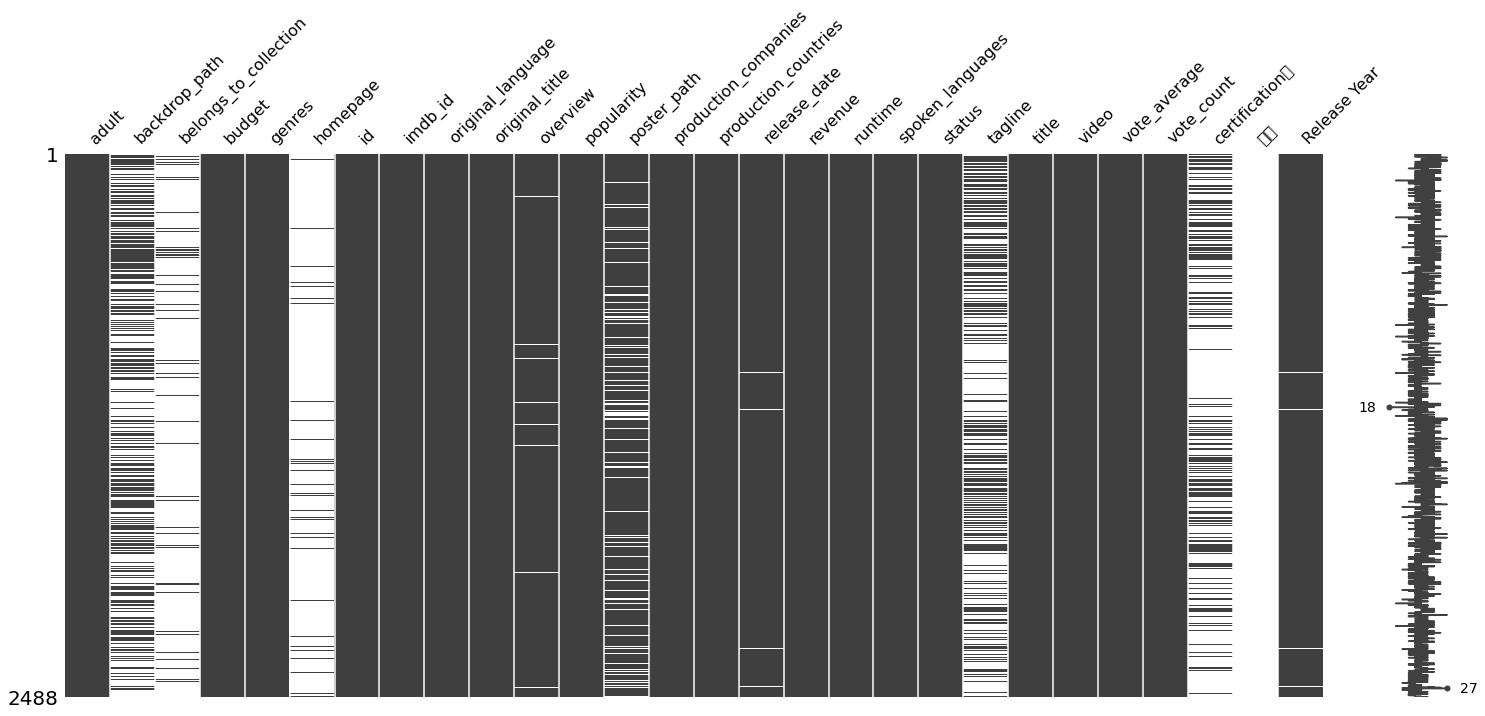

In [7]:
df.replace({'\r':np.nan},inplace=True)
pf.check_nulls_nunique(df)

In [8]:
df['certification'] = df['certification\r']
df['certification']

0        NaN
1        NaN
2        NaN
3       PG\r
4        R\r
        ... 
2483     NaN
2484     NaN
2485     NaN
2486    NR\r
2487     NaN
Name: certification, Length: 2488, dtype: object

In [9]:
df['certification'].value_counts()

R\r          450
PG-13\r      180
NR\r          66
PG\r          62
G\r           24
NC-17\r        6
Unrated\r      1
-\r            1
Name: certification, dtype: int64

In [10]:
df.replace({'R\r':'R', 'PG-13\r':'PG-13', 'PG\r':'PG', 'NR\r':'NR', 'G\r':'G', 'NC-17\r':'NC-17', 'Unrated\r':'Unrated', '-\r':'-'},inplace=True)
df['certification'].value_counts()

R          450
PG-13      180
NR          66
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [11]:
df = df.drop(columns=['certification\r', '\r\r'])

In [12]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Release Year,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.708,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22.0,2000.0,NaN
1,False,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.903,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8.0,2000.0,NaN
2,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0.0,2000.0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",21.723,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,1943.0,2000.0,PG
4,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.353,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46.0,2000.0,R


In [13]:
df = df.loc[ df['imdb_id']!='0']
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Release Year,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.708,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22.0,2000.0,NaN
1,False,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.903,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8.0,2000.0,NaN
2,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0.0,2000.0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",21.723,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,1943.0,2000.0,PG
4,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.353,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46.0,2000.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,False,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,tt7797670,en,Edmund Kemper Part 2: La Mort C'est La Vie,Underground French necrophilia nastiness,0.600,/2Xh5ywVZJC5OxKYDS26fVJfC8zq.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,False,0.000,0.0,2001.0,NaN
2484,False,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,tt7797790,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,0.600,/75kV4BpVnXe2kAMsWAKxx466M88.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,False,0.000,0.0,2001.0,NaN
2485,False,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,tt8665056,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,0.600,NaN,"[{'id': 68934, 'logo_path': None, 'name': 'Ske...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-10,0.0,85.0,[],Released,Evil came to the Southwest until three blazing.

# How many movies had at least some valid financial information? 
* (Values > 0 for budget OR Revenue)

In [14]:
filter_budget = df['budget'] > 0
filter_revenue = df['revenue'] > 0

# print value counts of the filters
print('- Movies with > 0 for budget: ')
display(filter_budget.value_counts())

print('- Movies with > 0 for revenue: ')
display(filter_revenue.value_counts())

- Movies with > 0 for budget: 


False    1953
True      535
Name: budget, dtype: int64

- Movies with > 0 for revenue: 


False    2056
True      432
Name: revenue, dtype: int64

In [15]:
# compare using & and | for filtering finacials
filter_and = filter_budget & filter_revenue
print('- If we use & for final filter: ')
display(filter_and.value_counts())

filter_or = filter_budget | filter_revenue
print('- If we use | for final filter: ')
display(filter_or.value_counts())

- If we use & for final filter: 


False    2140
True      348
dtype: int64

- If we use | for final filter: 


False    1869
True      619
dtype: int64

In [16]:
# Using filter_or
filter_financial = filter_and
filter_financial.value_counts()

False    2140
True      348
dtype: int64